In [1]:
import pandas as pd
from os import listdir
from os.path import isfile, join

In [2]:
files = [f for f in listdir('Tweets') if isfile(join('Tweets', f))]

In [3]:
df = pd.DataFrame()
for file in files:
    df = pd.concat([df, pd.read_pickle('Tweets/'+file)]) # TODO change file path for windows

In [4]:
df

,text,lang,created_at,conversation_id,author_id,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,context_annotations,query,referenced_tweets,in_reply_to_user_id,attachments.media_keys,geo.place_id,geo.coordinates.type,geo.coordinates.coordinates
0,Mann mit 3 Promille auf dem Fahrrad unterwegs ...,de,2022-05-01T08:02:10.000Z,1520674928034467842,928292161921208322,1520674928034467842,0,0,0,0,NaN,regio Fahrrad,NaN,NaN,NaN,NaN,NaN,NaN
1,Was hat sich bei der Bahn Regio Bayern verände...,de,2022-04-26T06:32:39.000Z,1518840462781657091,24357909,1518840462781657091,0,0,0,0,"[{'domain': {'id': '3', 'name': 'TV Shows', 'd...",regio Fahrrad,NaN,NaN,NaN,NaN,NaN,NaN
0,@DrkleineSonne regio. hab mein rad dabei geha...,de,2022-05-01T07:22:18.000Z,1520425478896631809,80626752,1520664896249253889,0,1,1,0,NaN,regio rad,"[{'type': 'replied_to', 'id': '152066396358275...",149492225,NaN,NaN,NaN,NaN
0,Mooie routes rijden met de Bosch Nyon: Bike+ i...,nl,2022-04-25T07:30:37.000Z,1518492661002510337,615124968,1518492661002510337,0,0,0,0,NaN,regio bike,NaN,NaN,[3_1518492659404484608],NaN,NaN,NaN
0,@oso_regio @Fernandomtycru @emerson_velo @Regi...,es,2022-04-26T23:34:47.000Z,1518811047922225152,531867319,1519097690700849153,0,0,3,0,NaN,regio velo,"[{'type': 'replied_to', 'id': '151900973592367...",1262076080011296768,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,We hope your weekend looks and feels just like...,en,2022-05-15T02:08:09.000Z,1525659265985290240,44665795,1525659265985290240,2,0,2,0,"[{'domain': {'id': '6', 'name': 'Sports Event'...",RE Mountainbike,NaN,NaN,[3_1525659263326212096],NaN,NaN,NaN
3,RT @OutbackMTB: When you're too fast for reali...,en,2022-05-10T22:12:59.000Z,1524150535431102465,1282001810144792578,1524150535431102465,1,0,0,0,"[{'domain': {'id': '66', 'name': 'Interests an...",RE Mountainbike,"[{'type': 'retweeted', 'id': '1524118372694253...",NaN,NaN,NaN,NaN,NaN
4,When you're too fast for reality 😎\nFollow ➡️ ...,en,2022-05-10T20:05:11.000Z,1524118372694253570,1287460950468165632,1524118372694253570,1,0,6,0,"[{'domain': {'id': '66', 'name': 'Interests an...",RE Mountainbike,NaN,NaN,[7_1524118333813104643],NaN,NaN,NaN
5,Wondering if you’re addicted to mountain bikin...,en,2022-05-09T00:05:29.000Z,1523454069712449542,1331751832750678016,1523454069712449542,0,0,0,1,"[{'domain': {'id': '66', 'name': 'Interests an...",RE Mountainbike,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_tmp = df[['id', 'public_metrics.retweet_count', 'public_metrics.reply_count', 'public_metrics.like_count', 'public_metrics.quote_count','query']]
df_tmp = pd.merge(df_tmp.groupby('id').agg({'public_metrics.retweet_count': 'max', 
                          'public_metrics.reply_count': 'max', 
                          'public_metrics.like_count': 'max', 
                          'public_metrics.quote_count': 'max'}),
         df_tmp.groupby('id')['query'].apply(list),
         on='id', how='inner')


In [6]:
df_tmp

,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,query
id,,,,,
1518193757107240960,0,1,2,0,[Tram bike]
1518198704490037249,2,0,0,0,[ICE rad]
1518198853580767232,6,0,0,0,[Zug Fahrrad]
1518199273569062912,46,0,0,0,[Stadtbahn Fahrrad]
1518203567496118273,0,1,3,0,[RE ebike]
...,...,...,...,...,...
1525760967950315520,10,0,0,0,[Bus bike]
1525761098829414400,0,0,0,0,[ÖPNV Fahrrad]
1525761207403171842,0,0,0,0,[RE bike]


In [7]:
df_tmp.reset_index()

,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,query
0,1518193757107240960,0,1,2,0,[Tram bike]
1,1518198704490037249,2,0,0,0,[ICE rad]
2,1518198853580767232,6,0,0,0,[Zug Fahrrad]
3,1518199273569062912,46,0,0,0,[Stadtbahn Fahrrad]
4,1518203567496118273,0,1,3,0,[RE ebike]
...,...,...,...,...,...,...
5187,1525760967950315520,10,0,0,0,[Bus bike]
5188,1525761098829414400,0,0,0,0,[ÖPNV Fahrrad]
5189,1525761207403171842,0,0,0,0,[RE bike]
5190,1525761382976724993,0,0,0,0,[Bus bike]


In [8]:
df = pd.merge(df[['text', 'id',
             'public_metrics.retweet_count', 
             'public_metrics.reply_count',
             'public_metrics.like_count', 
             'public_metrics.quote_count',             
             'lang',
             'created_at', 
             'conversation_id', 
             'author_id', 
            ]].drop_duplicates(), 
         df_tmp.reset_index(),
         on=['id',
             'public_metrics.retweet_count', 
             'public_metrics.reply_count',
             'public_metrics.like_count', 
             'public_metrics.quote_count'], 
         how='right')

In [9]:
df

,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,lang,created_at,conversation_id,author_id,query
0,@ah_lads I’m just back from Brussels (pop. 2m)...,1518193757107240960,0,1,2,0,en,2022-04-24T11:42:53.000Z,1518175487343960064,2905133196,[Tram bike]
1,"RT @spmrider: ICE 4, Fahrräder in Wagen 1 - bi...",1518198704490037249,2,0,0,0,de,2022-04-24T12:02:32.000Z,1518198704490037249,923544086,[ICE rad]
2,RT @Christoph_Br1: Warum sind es eigentlich im...,1518198853580767232,6,0,0,0,de,2022-04-24T12:03:08.000Z,1518198853580767232,966594033027035136,[Zug Fahrrad]
3,RT @Micha31281963: Sonntags in den Zoo?\nDie #...,1518199273569062912,46,0,0,0,de,2022-04-24T12:04:48.000Z,1518199273569062912,20429503,[Stadtbahn Fahrrad]
4,@anneramsey740 Postscript: I am amazed at how ...,1518203567496118273,0,1,3,0,en,2022-04-24T12:21:52.000Z,1518202709488410624,1475584232806363142,[RE ebike]
...,...,...,...,...,...,...,...,...,...,...,...
5187,RT @Itz_RockySK: Cibi oda chinna chinna vishiy...,1525760967950315520,10,0,0,0,et,2022-05-15T08:52:16.000Z,1525760967950315520,1282648602603446272,[Bus bike]
5188,@Jess__Valentine @ChangeGER Es gibt auch ÖPNV ...,1525761098829414400,0,0,0,0,de,2022-05-15T08:52:47.000Z,1524138103291756546,901732948411641857,[ÖPNV Fahrrad]
5189,@NamedMini And then you get a learners for a b...,1525761207403171842,0,0,0,0,en,2022-05-15T08:53:13.000Z,1525735827724193792,1606818740,[RE bike]
5190,@_dmoser What happened when London Mayor Khan ...,1525761382976724993,0,0,0,0,en,2022-05-15T08:53:55.000Z,1525731649417269251,1366465007375032325,[Bus bike]


In [10]:
df[df.lang=='de']

,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,lang,created_at,conversation_id,author_id,query
1,"RT @spmrider: ICE 4, Fahrräder in Wagen 1 - bi...",1518198704490037249,2,0,0,0,de,2022-04-24T12:02:32.000Z,1518198704490037249,923544086,[ICE rad]
2,RT @Christoph_Br1: Warum sind es eigentlich im...,1518198853580767232,6,0,0,0,de,2022-04-24T12:03:08.000Z,1518198853580767232,966594033027035136,[Zug Fahrrad]
3,RT @Micha31281963: Sonntags in den Zoo?\nDie #...,1518199273569062912,46,0,0,0,de,2022-04-24T12:04:48.000Z,1518199273569062912,20429503,[Stadtbahn Fahrrad]
6,@radkolumne Seit nun 2 Monaten: Bahn Bus Tram...,1518205949185560577,0,0,0,0,de,2022-04-24T12:31:19.000Z,1518199287871676417,2791876688,[Tram Fahrrad]
7,@radkolumne Hab mir gestern extra noch ein geb...,1518208189724045312,0,1,6,0,de,2022-04-24T12:40:14.000Z,1518199287871676417,1108457893555326978,[Zug rad]
...,...,...,...,...,...,...,...,...,...,...,...
5159,@LisaFeitsch @kkklawitter @RebeccaPeters_ Mein...,1525756519253528576,0,1,0,0,de,2022-05-15T08:34:36.000Z,1525542334171078657,3871150342,[ÖPNV rad]
5164,@neighborsaekki @GrueneBundestag Wohin genau? ...,1525757072213688320,0,0,0,0,de,2022-05-15T08:36:47.000Z,1524768027543224324,45310442,[ÖPNV Fahrrad]
5165,Triathlon ist alleine schon logistisch so viel...,1525757125770764288,0,1,0,0,de,2022-05-15T08:37:00.000Z,1525757125770764288,15127410,[Zug Fahrrad]
5171,@CaptainGourmand @Hornschild @Wissing An sich ...,1525757931383316480,0,1,1,0,de,2022-05-15T08:40:12.000Z,1525755730732666882,373579115,[bahn rad]


In [11]:
# Importsimport matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
# Product Scores
fig = px.histogram(df, x="public_metrics.like_count")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Verteilung der Likes')
fig.show()

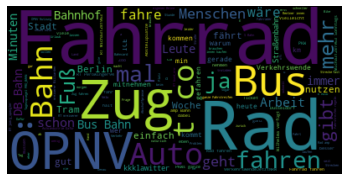

In [12]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create stopword list:
stopwords = set(nltk.corpus.stopwords.words('german'))
stopwords.update(["gt", "https"])
textt = " ".join(review for review in df[df.lang=='de'].text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [31]:
df[df.lang=='de'][['text','public_metrics.like_count']].sort_values(by='public_metrics.like_count', ascending=False)['text'].iloc[9]

'Oder für überhaupt irgendein Fahrrad. Oder für ÖPNV-Nutzung. Oder für den maximal ökologischen Gebrauch der eigenen Beine. Oder, oder, oder... Und mit jedem e-Auto (so sehr ich die generell begrüße) zementiert man die weitere Priorisierung der KFZ-Infrastruktur vor allen anderen. https://t.co/DNytcCAu9g'

In [13]:
# split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

KeyError: 'sentiment'

In [ ]:
neg = " ".join(review for review in negative.Summary)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()